In [1]:
# code and data: https://github.com/rpeden/cat-or-not/releases

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from PIL import Image
from random import shuffle, choice
import numpy as np
import os

In [2]:
IMAGE_SIZE = 256
IMAGE_DIRECTORY = './data/training_set'


In [3]:
def label_img(name):
    if name == 'cats': return np.array([1, 0])
    elif name == 'notcats' : return np.array([0, 1])

In [4]:
len(tuple(os.walk(IMAGE_DIRECTORY)))

3

In [5]:
tuple(os.walk(IMAGE_DIRECTORY))[0]

('./data/training_set', ['cats', 'notcats'], ['.DS_Store'])

In [6]:
next(os.walk(IMAGE_DIRECTORY))[1]

['cats', 'notcats']

In [7]:
list(os.walk(IMAGE_DIRECTORY))[0][1]

['cats', 'notcats']

In [8]:
next(os.walk(os.path.join(IMAGE_DIRECTORY, 'cats')))[2]

['.DS_Store',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.1001.jpg',
 'cat.1002.jpg',
 'cat.1003.jpg',
 'cat.1004.jpg',
 'cat.1005.jpg',
 'cat.1006.jpg',
 'cat.1007.jpg',
 'cat.1008.jpg',
 'cat.1009.jpg',
 'cat.101.jpg',
 'cat.1010.jpg',
 'cat.1011.jpg',
 'cat.1012.jpg',
 'cat.1013.jpg',
 'cat.1014.jpg',
 'cat.1015.jpg',
 'cat.1016.jpg',
 'cat.1017.jpg',
 'cat.1018.jpg',
 'cat.1019.jpg',
 'cat.102.jpg',
 'cat.1020.jpg',
 'cat.1021.jpg',
 'cat.1022.jpg',
 'cat.1023.jpg',
 'cat.1024.jpg',
 'cat.1025.jpg',
 'cat.1026.jpg',
 'cat.1027.jpg',
 'cat.1028.jpg',
 'cat.1029.jpg',
 'cat.103.jpg',
 'cat.1030.jpg',
 'cat.1031.jpg',
 'cat.1032.jpg',
 'cat.1033.jpg',
 'cat.1034.jpg',
 'cat.1035.jpg',
 'cat.1036.jpg',
 'cat.1037.jpg',
 'cat.1038.jpg',
 'cat.1039.jpg',
 'cat.104.jpg',
 'cat.1040.jpg',
 'cat.1041.jpg',
 'cat.1042.jpg',
 'cat.1043.jpg',
 'cat.1044.jpg',
 'cat.1045.jpg',
 'cat.1046.jpg',
 'cat.1047.jpg',
 'cat.1048.jpg',
 'cat.1049.jpg',
 'cat.105.jpg',
 'cat.1050.

In [9]:
choice?
choice(next(os.walk(os.path.join(IMAGE_DIRECTORY, 'cats')))[2])

'cat.2572.jpg'

In [10]:
def load_data():
    print("Loading images...")
    train_data = []
#     directories = next(os.walk(IMAGE_DIRECTORY))[1]
    directories = list(os.walk(IMAGE_DIRECTORY))[0][1]

    for dirname in directories: # ['cats', 'notcats']
        print("Loading {0}".format(dirname))
        file_names = next(os.walk(os.path.join(IMAGE_DIRECTORY, dirname)))[2]
        for i in range(len(file_names)): # len(file_names)
#             image_name = choice(file_names)
            image_name = file_names[i]
            image_path = os.path.join(IMAGE_DIRECTORY, dirname, image_name)
            label = label_img(dirname)
            if "DS_Store" not in image_path:
                img = Image.open(image_path)
                img = img.convert('L')
                img = img.resize((IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS)
                train_data.append([np.array(img)/255, label])
    return train_data


In [11]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation = 'softmax'))
#     model.add(Dense(2, activation = 'sigmoid'))

    return model

In [12]:
IMAGE_DIRECTORY = './data/training_set'
training_data = load_data()

import random
random.shuffle(training_data)

training_images = np.array([i[0] for i in training_data]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
training_labels = np.array([i[1] for i in training_data])
training_images.shape

Loading images...
Loading cats
Loading notcats


(5668, 256, 256, 1)

In [32]:
# Method 1
print('creating model')
model = create_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('training model')
# model.fit(training_images, training_labels, batch_size=32, epochs=10)
# model.fit(training_images, training_labels, batch_size=256, epochs=10, validation_split=0.2, shuffle= True)
model.fit(training_images, training_labels, batch_size=32, epochs=10, validation_split=0.2, shuffle= True)

model.save("model.h5")

creating model
training model
Epoch 1/10
142/142 [==============================] - 10s 57ms/step - loss: 0.6002 - accuracy: 0.7471 - val_loss: 1.0890 - val_accuracy: 0.7152
Epoch 2/10
142/142 [==============================] - 7s 52ms/step - loss: 0.4075 - accuracy: 0.8372 - val_loss: 1.3423 - val_accuracy: 0.7152
Epoch 3/10
142/142 [==============================] - 7s 51ms/step - loss: 0.3568 - accuracy: 0.8527 - val_loss: 0.6856 - val_accuracy: 0.7160
Epoch 4/10
142/142 [==============================] - 7s 51ms/step - loss: 0.2663 - accuracy: 0.8914 - val_loss: 0.6433 - val_accuracy: 0.7787
Epoch 5/10
142/142 [==============================] - 8s 53ms/step - loss: 0.2158 - accuracy: 0.9159 - val_loss: 0.4900 - val_accuracy: 0.8351
Epoch 6/10
142/142 [==============================] - 7s 53ms/step - loss: 0.1711 - accuracy: 0.9313 - val_loss: 0.4681 - val_accuracy: 0.7866
Epoch 7/10
142/142 [==============================] - 7s 52ms/step - loss: 0.1301 - accuracy: 0.9522 - val_loss

In [37]:
# Method 2: train_test_split
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(training_images, training_labels, test_size=0.2, random_state=8, stratify=training_labels)

print('creating model')
model = create_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('training model')
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', mode="max", save_best_only=True, verbose=1)

History = model.fit(x_train2, y_train2, epochs=15, batch_size=32,
                    validation_data=(x_test2, y_test2), callbacks=[checkpoint])

creating model
training model
Epoch 1/15
142/142 [==============================] - 10s 57ms/step - loss: 0.5907 - accuracy: 0.7488 - val_loss: 0.6393 - val_accuracy: 0.7055

Epoch 00001: val_accuracy improved from -inf to 0.70547, saving model to model.h5
Epoch 2/15
142/142 [==============================] - 7s 52ms/step - loss: 0.4145 - accuracy: 0.8289 - val_loss: 1.0814 - val_accuracy: 0.7055

Epoch 00002: val_accuracy did not improve from 0.70547
Epoch 3/15
142/142 [==============================] - 7s 51ms/step - loss: 0.3531 - accuracy: 0.8568 - val_loss: 0.8334 - val_accuracy: 0.7108

Epoch 00003: val_accuracy improved from 0.70547 to 0.71076, saving model to model.h5
Epoch 4/15
142/142 [==============================] - 7s 52ms/step - loss: 0.2743 - accuracy: 0.8945 - val_loss: 0.5453 - val_accuracy: 0.7848

Epoch 00004: val_accuracy improved from 0.71076 to 0.78483, saving model to model.h5
Epoch 5/15
142/142 [==============================] - 7s 52ms/step - loss: 0.2359 - ac

In [18]:
# Method 3: With ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             validation_split=0.2)
print('creating model')
model = create_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('training model')
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', mode="max", save_best_only=True, verbose=1)

datagen.fit(training_images)
History = model.fit(datagen.flow(training_images, training_labels, batch_size=32, subset='training'),
                    epochs=20,
                    steps_per_epoch = 142,
                    validation_data=datagen.flow(training_images, training_labels, batch_size=8, subset='validation'), 
                    validation_steps=30,
                    callbacks=[checkpoint])

creating model
training model
Epoch 1/20
142/142 [==============================] - 19s 120ms/step - loss: 0.5982 - accuracy: 0.7485 - val_loss: 0.8431 - val_accuracy: 0.6958

Epoch 00001: val_accuracy improved from -inf to 0.69583, saving model to model.h5
Epoch 2/20
142/142 [==============================] - 16s 116ms/step - loss: 0.4660 - accuracy: 0.8083 - val_loss: 1.0921 - val_accuracy: 0.7917

Epoch 00002: val_accuracy improved from 0.69583 to 0.79167, saving model to model.h5
Epoch 3/20
142/142 [==============================] - 16s 116ms/step - loss: 0.4109 - accuracy: 0.8245 - val_loss: 0.9892 - val_accuracy: 0.7042

Epoch 00003: val_accuracy did not improve from 0.79167
Epoch 4/20
142/142 [==============================] - 16s 116ms/step - loss: 0.4043 - accuracy: 0.8305 - val_loss: 0.6789 - val_accuracy: 0.7542

Epoch 00004: val_accuracy did not improve from 0.79167
Epoch 5/20
142/142 [==============================] - 16s 115ms/step - loss: 0.3805 - accuracy: 0.8416 - val_

In [37]:
# Method 4: With ImageDataGenerator + train_test_split
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(training_images, training_labels, test_size=0.2, random_state=8, stratify=training_labels)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             validation_split=0.2)
print('creating model')
model = create_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('training model')
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', mode="max", save_best_only=True, verbose=1)

History = model.fit(datagen.flow(x_train2, y_train2, batch_size=32, subset='training'),
                    epochs=50,
                    steps_per_epoch = 142,
                    validation_data=(x_test2, y_test2), 
                    validation_steps=30,
                    callbacks=[checkpoint])

creating model
training model
Epoch 1/50
142/142 [==============================] - 19s 120ms/step - loss: 0.6289 - accuracy: 0.7162 - val_loss: 0.6650 - val_accuracy: 0.7055

Epoch 00001: val_accuracy improved from -inf to 0.70547, saving model to model.h5
Epoch 2/50
142/142 [==============================] - 16s 117ms/step - loss: 0.4677 - accuracy: 0.8055 - val_loss: 1.4051 - val_accuracy: 0.7055

Epoch 00002: val_accuracy did not improve from 0.70547
Epoch 3/50
142/142 [==============================] - 17s 120ms/step - loss: 0.4296 - accuracy: 0.8220 - val_loss: 0.6039 - val_accuracy: 0.7354

Epoch 00003: val_accuracy improved from 0.70547 to 0.73545, saving model to model.h5
Epoch 4/50
142/142 [==============================] - 16s 116ms/step - loss: 0.3934 - accuracy: 0.8373 - val_loss: 0.5305 - val_accuracy: 0.8086

Epoch 00004: val_accuracy improved from 0.73545 to 0.80864, saving model to model.h5
Epoch 5/50
142/142 [==============================] - 16s 116ms/step - loss: 0.

142/142 [==============================] - 18s 124ms/step - loss: 0.0936 - accuracy: 0.9610 - val_loss: 0.2128 - val_accuracy: 0.9409

Epoch 00040: val_accuracy did not improve from 0.94092
Epoch 41/50
142/142 [==============================] - 16s 117ms/step - loss: 0.0989 - accuracy: 0.9633 - val_loss: 0.2285 - val_accuracy: 0.9206

Epoch 00041: val_accuracy did not improve from 0.94092
Epoch 42/50
142/142 [==============================] - 16s 114ms/step - loss: 0.0791 - accuracy: 0.9649 - val_loss: 0.2197 - val_accuracy: 0.9400

Epoch 00042: val_accuracy did not improve from 0.94092
Epoch 43/50
142/142 [==============================] - 16s 113ms/step - loss: 0.0876 - accuracy: 0.9660 - val_loss: 0.2087 - val_accuracy: 0.9312

Epoch 00043: val_accuracy did not improve from 0.94092
Epoch 44/50
142/142 [==============================] - 16s 112ms/step - loss: 0.0963 - accuracy: 0.9609 - val_loss: 0.2107 - val_accuracy: 0.9321

Epoch 00044: val_accuracy did not improve from 0.94092
Ep

In [38]:
# Load best model
from keras.models import load_model
model = load_model("model.h5")

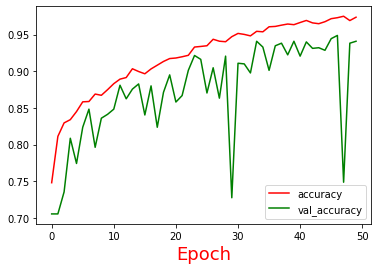

In [39]:
import matplotlib.pyplot as plt 
plt.plot(History.history['accuracy'], 'r', label = 'accuracy')
plt.plot(History.history['val_accuracy'], 'g', label = 'val_accuracy')
plt.xlabel('Epoch', fontdict={'c': 'r', 'size': 18})
plt.legend(loc='lower right')

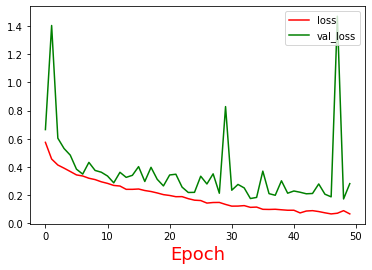

In [40]:
plt.plot(History.history['loss'], 'r', label = 'loss')
plt.plot(History.history['val_loss'], 'g', label = 'val_loss')
plt.xlabel('Epoch', fontdict={'c': 'r', 'size': 18})
plt.legend(loc='upper right')

In [41]:
IMAGE_DIRECTORY = './data/test_set'
test_data = load_data()
test_images = np.array([i[0] for i in test_data]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
test_labels = np.array([i[1] for i in test_data])

Loading images...
Loading cats
Loading notcats


In [26]:
test_images.shape

(2665, 256, 256, 1)

In [27]:
test_labels.shape, training_labels.shape

((2665, 2), (5668, 2))

In [42]:
loss, acc = model.evaluate(test_images, test_labels, verbose=1)
print("accuracy: {0}".format(acc * 100))

84/84 [==============================] - 2s 17ms/step - loss: 0.3657 - accuracy: 0.8754
accuracy: 87.54221200942993


In [43]:
loss, acc = model.evaluate(training_images, training_labels, verbose=1)
print("accuracy: {0}".format(acc * 100))

178/178 [==============================] - 3s 17ms/step - loss: 0.0775 - accuracy: 0.9748
accuracy: 97.47706651687622


In [44]:
training_images.shape

(5668, 256, 256, 1)